In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
data.shape

(200, 5)

In [36]:
data=data.drop(["CustomerID","Genre"],axis=1)


In [37]:
data.shape

(200, 3)

In [6]:
# Correlation Matrix
dfcorr=data.corr()
dfcorr

C:\Users\Brayo G\AppData\Local\Temp\ipykernel_10572\2395767522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr=data.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [7]:
#The covariance matrix
datacov=data.cov()
datacov

C:\Users\Brayo G\AppData\Local\Temp\ipykernel_10572\985805709.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacov=data.cov()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,3350.000000,-21.638191,1486.050251,20.678392
Age,-21.638191,195.133166,-4.548744,-118.040201
Annual Income (k$),1486.050251,-4.548744,689.835578,6.716583
Spending Score (1-100),20.678392,-118.040201,6.716583,666.854271


In [39]:
#Eigen matrix
#COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS
eigenvalues,eigenvectors=np.linalg.eig(datacov)
eigenvalues=pd.DataFrame(eigenvalues)
print(eigenvalues)
eigenvectors=pd.DataFrame(eigenvectors)
print(eigenvectors)
eigen=pd.concat([eigenvalues,eigenvectors],axis=1)
print(eigen)
#There is high multicollinierity,which adversely affects the conclussions
# eigen.index=data.columns
# eigen.columns=("Eigen values","Age","AnnualIncome(k$)","spending score(1-100)")
# eigen

             0
0  4014.546653
1   694.555743
2    25.429118
3   167.291502
          0         1         2         3
0  0.912909 -0.005126 -0.408056  0.007766
1 -0.005864 -0.229729 -0.028746 -0.972812
2  0.408066 -0.007727  0.912503 -0.027599
3  0.006664  0.973210 -0.001690 -0.229813
             0         0         1         2         3
0  4014.546653  0.912909 -0.005126 -0.408056  0.007766
1   694.555743 -0.005864 -0.229729 -0.028746 -0.972812
2    25.429118  0.408066 -0.007727  0.912503 -0.027599
3   167.291502  0.006664  0.973210 -0.001690 -0.229813


In [40]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)

## Performing PCA

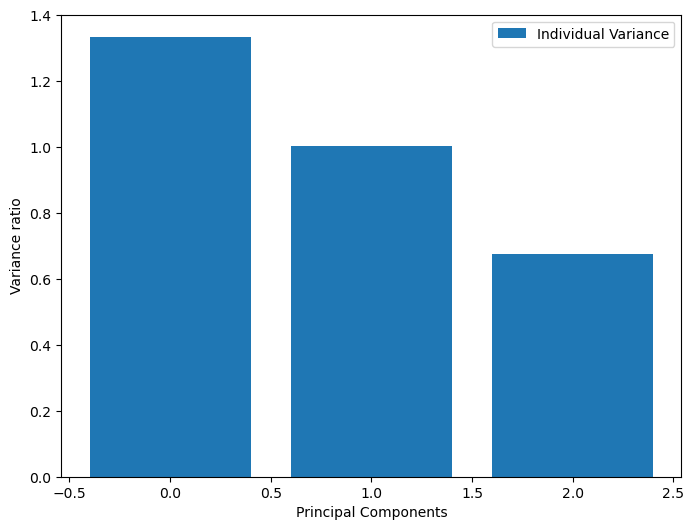

In [42]:
#Performing PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(data)
pca_variance=pca.explained_variance_
plt.figure(figsize=(8,6))
plt.bar(range(3),pca_variance,align="center",label="Individual Variance")
plt.legend()
plt.ylabel("Variance ratio")
plt.xlabel("Principal Components")
plt.show()

In [51]:
pca=PCA(n_components=3).fit(data)
print(pca)
pca_components=pca.components_.T
pca_components=pd.DataFrame(pca_components)
print(pca_components)

pca_components.index=['Age',"Annual income","Spending score"]
pca_components.columns=['Age',"Annual income","Spending score"]
pca_components

PCA(n_components=3)
          0         1         2
0  0.706382  0.030141 -0.707188
1 -0.048024  0.998832 -0.005398
2 -0.706199 -0.037775 -0.707005


,Age,Annual income,Spending score
Age,0.706382,0.030141,-0.707188
Annual income,-0.048024,0.998832,-0.005398
Spending score,-0.706199,-0.037775,-0.707005


In [56]:
#finalizing on the PCA
pca2=PCA(n_components=3)
pca2.fit(data)
x_3d=pca2.transform(data)
print(x_3d)
plt.figure(figsize=(8,6))
# plt.scatter(x_3d[:,0],x_3d[:,2],c=data["Annual Income (k$)"])
plt.scatter(x_3d[:,0], x_3d[:,2], c=data['Annual Income (k$)'])
plt.xlabel("y")
plt.show()

[[-6.15720019e-01 -1.76348088e+00  1.32423216e+00]
 [-1.66579271e+00 -1.82074695e+00  6.99522397e-02]
 [ 3.37861909e-01 -1.67479894e+00  2.17902515e+00]
 [-1.45657325e+00 -1.77242992e+00  7.80291311e-02]
 [-3.84652078e-02 -1.66274012e+00  6.87342188e-01]
 [-1.48168526e+00 -1.73500173e+00  1.56022687e-01]
 [ 1.09461665e+00 -1.56610230e+00  1.41732448e+00]
 [-1.92630736e+00 -1.72111049e+00 -3.88982252e-01]
 [ 2.64517786e+00 -1.46084721e+00  2.76348759e-02]
 [-9.70130513e-01 -1.63558108e+00 -1.40621897e-01]
 [ 2.49568861e+00 -1.47048914e+00 -4.26540046e-01]
 [-1.45688256e+00 -1.66436050e+00 -1.13545426e+00]
 [ 2.01018729e+00 -1.45329897e+00  2.58006040e-03]
 [-1.41321072e+00 -1.61776746e+00  2.64524163e-02]
 [ 1.00042965e+00 -1.49579176e+00  1.12327814e+00]
 [-1.56943170e+00 -1.62502669e+00  7.30635263e-02]
 [ 2.94060318e-01 -1.49425585e+00  6.20742845e-01]
 [-1.31624924e+00 -1.57216383e+00  5.31173876e-01]
 [ 1.31669910e+00 -1.37243404e+00 -7.77808625e-02]
 [-1.43679899e+00 -1.51039469e+

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 800x600 with 0 Axes>

In [57]:
data=pca.transform(data)

### Elbow curve
It is used to discover the number of clusters in the data

It has the number of clusters on the x-axis and percent of the variance explained on the y-axis

A cutoff point is used to select the number of of clusters.
A cutoff is a point at which a smooth bend ends and a sharpa end begins

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

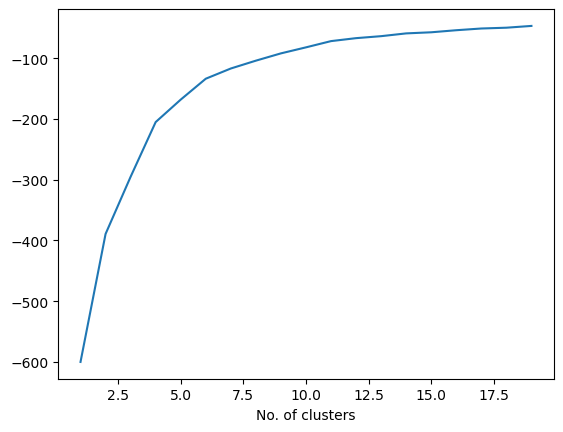

In [60]:
from sklearn.cluster import KMeans

Nc=range(1,20)
kmeans=[KMeans(n_clusters=i) for i in Nc]
scores=[kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
fig,ax=plt.subplots()
plt.plot(Nc,scores)
plt.xlabel("No. of clusters")
plt.show()

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

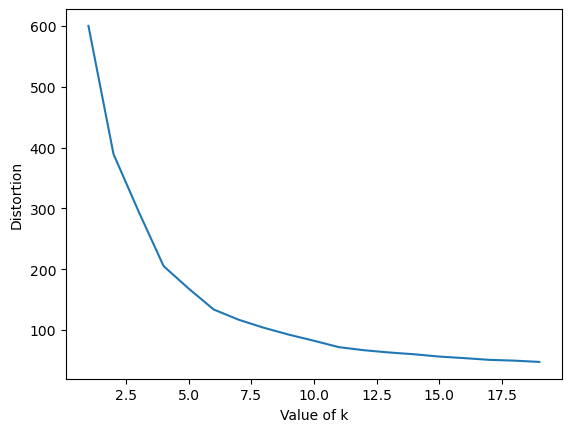

In [62]:
#finding cutoff point using scree plot
ks=range(1,20)
ds=[]
for k in ks:
    cls=KMeans(n_clusters=k)
    cls.fit(data)
    ds.append(cls.inertia_)
fig,ax=plt.subplots()
plt.plot(ks,ds)
plt.xlabel("Value of k")
plt.ylabel("Distortion")
plt.show()

## # K-means clustering

In [64]:
kmeans=KMeans(n_clusters=3)
kmeans_output=kmeans.fit(data)
kmeans_output

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Hyperparametre optimization

In [67]:
from sklearn.model_selection import GridSearchCV

param_gridkmeans={"copy_x":[False,True],
                 "max_iter":[1,10,100,1000],
                 "n_init":[5,10,15,20],
                 "tol":[0.0001,0.001,0.01,1.0]}
grid_modelkmeans=GridSearchCV(estimator=kmeans_output,param_grid=param_gridkmeans)
grid_modelkmeans.fit(data)
print("Best score:",grid_modelkmeans.best_score_,"Best hyper-parametres:",grid_modelkmeans.best_params_)

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\clust

Best score: -98.26519538286232 Best hyper-parametres: {'copy_x': True, 'max_iter': 1, 'n_init': 5, 'tol': 0.01}


In [69]:
## finalizing the model
kmeans=KMeans(n_clusters=3,copy_x=True,max_iter=1,n_init=5,tol=0.01)
kmeans_output=kmeans.fit(data)
kmeans_output

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1, n_clusters=3, n_init=5, tol=0.01)

In [70]:
#predicted labels
y_predkmeans=pd.DataFrame(kmeans_output.labels_,columns=["Predicted"])
y_predkmeans

,Predicted
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


### Finding the centroids of the clusters

In [72]:
kmean_centroids=pd.DataFrame(kmeans_output.cluster_centers_,columns=("cluster 1","cluster 2","cluster 3"))
kmean_centroids

,cluster 1,cluster 2,cluster 3
0,-1.081068,-0.398259,0.034580
1,0.376011,0.699353,0.449137
2,1.130967,-0.430331,-0.732627


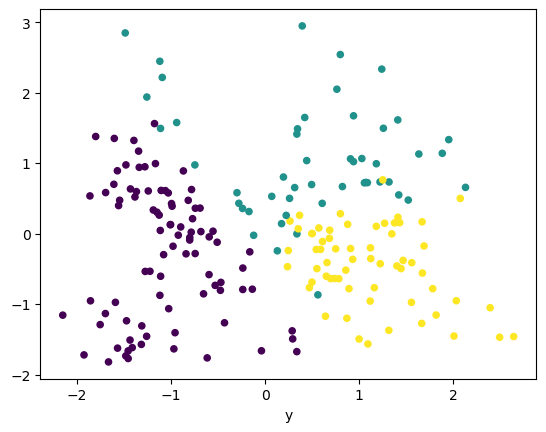

In [79]:
#visualizing the Kmeans maodel
plt.scatter(data[:,0],data[:,1],c=kmeans_output.labels_,cmap="viridis",s=20)
# plt.scatter(kmean_centroids[:,0],kmean_centroids[:,1],color="red")
# plt.scatter(kmean_centroids[:,0],kmean_centroids[:,1],kmean_centroids[:,2],color="red")

plt.xlabel("y")
plt.show()

### silhoutte score
The method compares cohession and separation

It ahs value ranges from -1 to 1

      -1 indicates  servere missassembling,
      0 -overlaps in clusters and
      1-sample is far away from adjacent clusters

In [82]:
from sklearn.metrics import silhouette_score as ss
ss(data,y_predkmeans)
#the silhouette indicates that the score is far from perfect

D:\ALL python and adata science\anaconda run\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3259398009607942